# 01 - Data Exploration

This notebook explores the air quality dataset, its structure, and basic statistics.

Shape of Dataset: (250, 9)

First 5 Rows:
         City    Datetime  PM2.5   PM10    NO2   SO2    CO     O3    AQI
0  Bangalore  2018-08-06  171.3   26.7   86.1  25.2  1.09  173.6    3.8
1  Bangalore  2019-08-02  414.6  544.3  142.3  43.7  0.20    1.4  412.4
2  Bangalore  2015-08-18  492.6  492.4   16.0   0.3  0.45  190.9  415.1
3  Bangalore  2024-03-07  148.3  373.9   80.3  19.3  8.42  158.6  122.7
4  Bangalore  2021-01-31  274.6   55.3   46.3  15.1  0.86   26.9  241.4

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      250 non-null    object 
 1   Datetime  250 non-null    object 
 2   PM2.5     250 non-null    float64
 3   PM10      250 non-null    float64
 4   NO2       250 non-null    float64
 5   SO2       250 non-null    float64
 6   CO        250 non-null    float64
 7   O3        250 non-null    float64
 8   AQI 

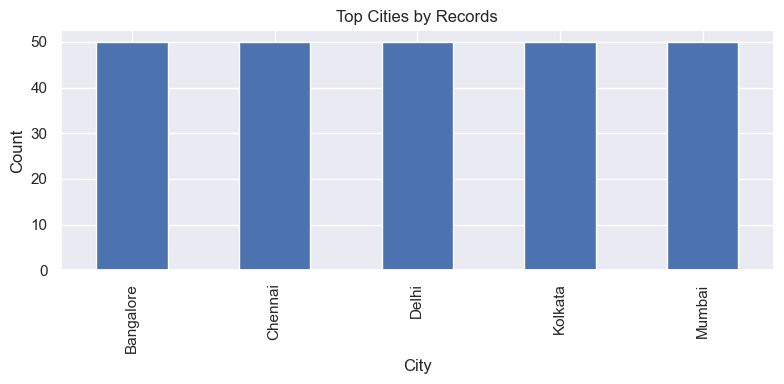

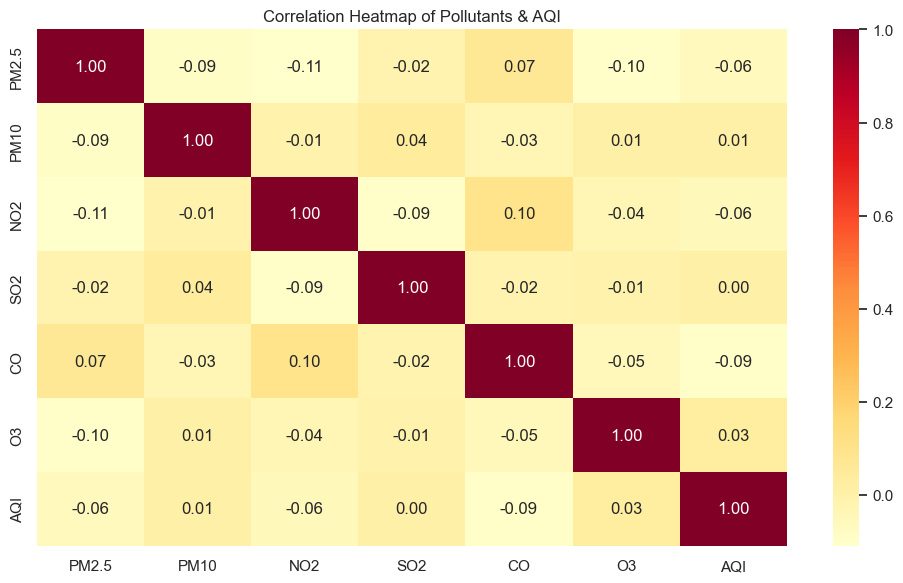

✅ Data exploration completed. Ready for preprocessing.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

# Load the dataset (expects AIR_QUALITY/data/air_quality.csv)
df = pd.read_csv('../data/air_quality.csv')

print('Shape of Dataset:', df.shape)
print('\nFirst 5 Rows:\n', df.head())
print('\n--- Dataset Info ---')
print(df.info())
print('\n--- Statistical Summary ---')
print(df.describe(include='all'))
print('\n--- Missing Values ---')
print(df.isnull().sum())

# Standardize column names (strip spaces)
df.columns = [c.strip() for c in df.columns]

# AQI_Bucket distribution and plot (if present)
if 'AQI_Bucket' in df.columns:
    print('\nAQI_Bucket Value Counts:\n', df['AQI_Bucket'].value_counts())
    plt.figure(figsize=(7,4))
    sns.countplot(data=df, x='AQI_Bucket', order=df['AQI_Bucket'].value_counts().index)
    plt.title('Distribution of AQI Categories')
    plt.xticks(rotation=30)
    plt.show()

# Top cities by record count (if City present)
if 'City' in df.columns:
    plt.figure(figsize=(8,4))
    df['City'].value_counts().head(15).plot(kind='bar')
    plt.title('Top Cities by Records')
    plt.xlabel('City'); plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Correlation heatmap for numeric cols
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Correlation Heatmap of Pollutants & AQI')
plt.tight_layout()
plt.show()

print('✅ Data exploration completed. Ready for preprocessing.')

➡️ Proceed to **02_preprocessing.ipynb** for data cleaning and feature engineering.